# ***HW04***
---

### ***Problem01***

<function matplotlib.pyplot.show(close=None, block=None)>

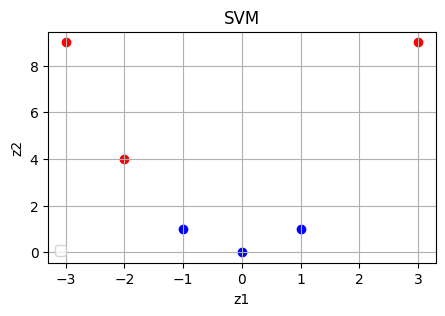

In [ ]:
### (2)
import matplotlib.pyplot as plt
import numpy as np
# Data points
x1 = np.array([-3, -2, 3])
y1 = np.array([9, 4, 9])
x2 = np.array([-1, 0, 1])
y2 = np.array([1, 0, 1])
# Scatter plot
plt.figure(figsize=(5,3))
plt.scatter(x1, y1, color="red")
plt.scatter(x2, y2, color="blue")
plt.xlabel("z1")
plt.ylabel("z2")
plt.title("SVM")
plt.legend()
plt.grid()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

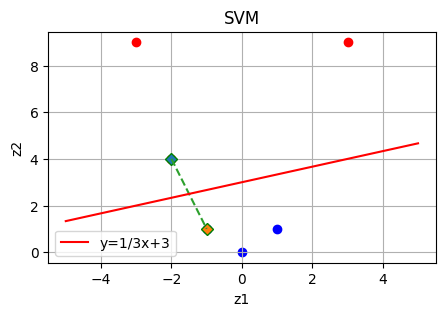

In [ ]:
### (6), (7)
# Data points
x1 = np.array([-3, -2, 3])
y1 = np.array([9, 4, 9])
x2 = np.array([-1, 0, 1])
y2 = np.array([1, 0, 1])
# Linear function
x = np.linspace(-5, 5, 100)
y = (1/3)*x+3 
# Support Vector
sv_x1 = np.array([-2])
sv_y1 = np.array([4])
sv_x2 = np.array([-1])
sv_y2 = np.array([1])
# Margin
point1 = [-2, 4]
point2 = [-1, 1] 
x_values = [point1[0], point2[0]]
y_values = [point1[1], point2[1]]
# Scatter plot
plt.figure(figsize=(5,3))
plt.plot(sv_x1, sv_y1 ,marker="D", markeredgecolor="green")
plt.plot(sv_x2, sv_y2 ,marker="D", markeredgecolor="green")
plt.plot(x_values, y_values, linestyle="--")
plt.plot(x, y, "-r", label="y=1/3x+3")
plt.scatter(x1, y1, color="red")
plt.scatter(x2, y2, color="blue")
plt.xlabel("z1")
plt.ylabel("z2")
plt.title("SVM")
plt.legend()
plt.grid()
plt.show

### ***Problem02***

In [ ]:
### Build Perceptron Algorithm
from sklearn.base import BaseEstimator
import pandas as pd
import numpy as np

class Perceptron(BaseEstimator):
    def __init__(self, alpha, n_epochs):
        self.alpha = alpha
        self.n_epochs = n_epochs
        
    def fit(self, X, y):
        (n, m) = X.shape
        self.w = np.random.randn(m)
        self.b = 0
        
        # Train NN
        for epoch in range(self.n_epochs):
            n_errors = 0
            for i in range(n):
                o = self.predict(X[i])
                if o != y[i]:
                    self.w += self.alpha * 2*(y[i] - o) * X[i]
                    self.b += self.alpha * 2*(y[i] - o)
                    n_errors += 1
            
            # Get accuracy 
            accuracy = 1 - (n_errors / n)
            print("Epoch:", (epoch+1), "Accuracy:", (accuracy))
            
            if n_errors == 0:
                break
                
    def predict(self, X):
        z = X @ self.w + self.b
        return np.heaviside(z, 1)

### Proceed Data
x0 = [1,1,1,1,1,1,1,1] # Bias
x1 = [1,1,0,-1,1,-1,0,1]
x2 = [4,2,0,4,0,-1,-4,0]
x3 = [1,3,1,0,-2,1,0,-3]
y = [1,1,1,1,0,0,0,0] # Target
df = pd.DataFrame({"x0":x0, "x1":x1, "x2":x2, "x3":x3, "y":y})
df

# Data Split
X = df.drop(["y"], axis=1)
y = df["y"]
X = np.array(X)
y = np.array(y)

# Perceptron
perceptron = Perceptron(alpha=0.5, n_epochs=2)
perceptron.fit(X, y)

Epoch: 1 Accuracy: 0.875
Epoch: 2 Accuracy: 1.0


In [ ]:
### Compared between Perceptron Algorithm and sklearn Perceptron 
# Import Data set
import numpy as np
import pandas as pd
x0 = [1,1,1,1,1,1,1,1] # Bias
x1 = [1,1,0,-1,1,-1,0,1]
x2 = [4,2,0,4,0,-1,-4,0]
x3 = [1,3,1,0,-2,1,0,-3]
y = [1,1,1,1,0,0,0,0] # Target
df = pd.DataFrame({"x0":x0, "x1":x1, "x2":x2, "x3":x3, "y":y})
df

# Data Split
X = df.drop(["y"], axis=1)
y = df["y"]

# Fit 
from sklearn.linear_model import Perceptron 
clf = Perceptron(alpha=0.5, n_jobs=-1, max_iter=2, random_state=22) 
clf.fit(X, y) 
clf.score(X, y)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


0.875

### ***Problem03***

In [ ]:
### MNIST Image Classification 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
class NN:
  def __init__(self, n_hidden, n_output, epochs, batch_size, learning_rate):
    self.n_hidden = n_hidden
    self.n_output = n_output
    self.epochs = epochs
    self.batch_size = batch_size
    self.learning_rate = learning_rate

  def sigmoid(self, x):
    """Compute the sigmoid function for the input here."""
    ### YOUR CODE HERE
    s = 1.0 / (1+np.exp(-x))
    ### END YOUR CODE
    return s

  def sigmoid_deriv(self, x):
    """Compute the derivative of the sigmoid function here."""
    ### YOUR CODE HERE
    d = self.sigmoid(x) * (1-self.sigmoid(x))
    ### END YOUR CODE
    return d

  def softmax(self, x):
    """Compute softmax function for input."""
    ### YOUR CODE HERE
    s = np.exp(x) 
    s = s / s.sum(axis=0, keepdims=True) 
    ### END YOUR CODE
    return s

  def feed_forward(self, X):
    """
    Forward propagation
    return cache: a dictionary containing the activations of all the units
    output: the predictions of the network
    """
    ### YOUR CODE HERE
    parameters = self.init_weights(784)
    W1, b1, W2, b2 = parameters['W1'], parameters['b1'], parameters['W2'], parameters['b2']
    Z1 = W1.dot(X) + b1
    A1 = self.sigmoid(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = self.softmax(Z2) 
    output = {"Z1": Z1,
               "A1": A1,
               "Z2": Z2,
               "A2": A2}
    ### END YOUR CODE
    cache = {}
    cache['Z1'] = Z1
    cache['A1'] = A1
    cache['Z2'] = Z2
    cache['A2'] = A2
    return cache, output

  def back_propagate(self, X, y, cache, grads):
    """Return the gradients of the parameters"""
    ### YOUR CODE HERE
    m = X.shape[1] 
    y = self.one_hot_labels(y)
    dZ2 = cache["A2"] - y 
    dW2 = 1/m * (np.dot(dZ2, cache["A1"].T))
    db2 = 1/m * (np.sum(dZ2, axis=1, keepdims=True)) 
    dZ1 = np.dot(cache["W2"].T, dZ2) * (1-np.power(cache["A1"], 2)) 
    dW1 = 1/m * (np.dot(dZ1, X.T))
    db1 = 1/m * (np.sum(dZ1, axis=1, keepdims=True))
    ### END YOUR CODE. 
    grads = {}
    grads['W1'] = dW1
    grads['b1'] = db1
    grads['W2'] = dW2
    grads['b2'] = db2
    return grads

  def init_weights(self, num_input):
    ### YOUR CODE HERE
    W1 = np.random.randn(300, 784) * 0.1 
    b1 = np.zeros((300, 1)) 
    W2 = np.random.randn(10, 300) * 0.1 
    b2 = np.zeros((10, 1)) 
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    return parameters
    ### END YOUR CODE

  def update_weights(self, grads):
    ### YOUR CODE HERE
    W1 = W1 - 5*grads["dW1"]
    b1 = b1 - 5*grads["db1"] 
    W2 = W2 - 5*grads["dW2"]
    b2 = b2 - 5*grads["db2"]
    parameters = {"W1": W1, "b1": b1,"W2": W2,"b2": b2}
    return parameters
    ### END YOUR CODE

  def compute_loss(self, y, output):
    """Return the cross-entropy loss"""
    ### YOUR CODE HERE
    m = y.shape[1]
    y = self.one_hot_labels(y)
    logprobs = np.multiply(np.log(output), y) + np.multiply(np.log(1-output), 1-y)
    loss = -np.sum(logprobs) * (1/m)
    ### END YOUR CODE
    return loss

  def train(self, X_train, y_train, X_val, y_val):
    (n, m) = X_train.shape
    parameters = self.init_weights(m)
    ### YOUR CODE HERE
    for i in range(0, self.epochs):
      cache, output = self.feed_forward(X_train)
      loss = self.compute_loss(y, output)
      grads = self.back_propagate(X_train, y_train, cache)
      parameters = self.update_weights(grads) 
    
    cache, output = self.feed_forward(X_val, y_val) 
    accuracy = self.compute_accuracy(output, y_val)
    return accuracy
    ### END YOUR CODE

  def test(self, X_test, y_test):
    cache, output = self.feed_forward(X_test)
    accuracy = self.compute_accuracy(output, y_test)
    return accuracy

  def compute_accuracy(self, y, output):
    accuracy = (np.argmax(y, axis=1) == np.argmax(output, axis=1)).sum() * 1. / y.shape[0]
    return accuracy

  def one_hot_labels(self, y):
    one_hot_labels = np.zeros((y.size, self.n_output))
    one_hot_labels[np.arange(y.size), y.astype(int)] = 1
    return one_hot_labels

  def main():
    nn = NN(n_hidden=300, n_output=10, epochs=30, batch_size=1000, learning_rate=5)
    np.random.seed(100)
    X, y = fetch_openml('mnist_784', return_X_y=True, as_frame=False)
    X = (X / 255).astype('float32')
    X_train, y_train = X[0:60000], y[0:60000]
    y_train = nn.one_hot_labels(y_train)
    p = np.random.permutation(60000)
    X_train = X_train[p]
    y_train = y_train[p]
    X_val = X_train[0:10000]
    y_val = y_train[0:10000]
    X_train = X_train[10000:]
    y_train = y_train[10000:]
    X_test, y_test = X[60000:], y[60000:]
    y_test = nn.one_hot_labels(y_test)
    nn.train(X_train, y_train, X_val, y_val)
    accuracy = nn.test(X_test, y_test)
    print(f'Test accuracy: {accuracy}')

if __name__ == '__main__':
  main()

NameError: ignored

In [1]:
### MNIST 
"""
Build MLP using MNIST Data set 
Initialize the bias/intercept = 0, Hidden units = 300, Learning Rate = 5
Mini batch size(B) = 1,000 
Epoch = 50 iterations 

Train the model with mini-batch descent (Run 30 epochs) 
Plot y:Loss x: number of epochs 
Plot y:Accuracy x: number of epochs 
"""
### Import Libaries 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.neural_network import MLPClassifier
### Import Data set
from sklearn import datasets 
mn_data = datasets.load_digits() 
X = mn_data["images"] 
y = mn_data["target"]
### Preprocessing 
samples = len(X) 
X = X.reshape((samples, -1)) 
### Split Data set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)
print(X_train.shape)
print(X_test.shape)

(1437, 64)
(360, 64)


In [11]:
### Train Model 
from sklearn.model_selection import ShuffleSplit
shuffle = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0) 
# clf 
train_clf = MLPClassifier(hidden_layer_sizes=(300), activation="logistic", 
                    solver="sgd", learning_rate_init=5, batch_size=1000, max_iter=50, early_stopping=False,
                    random_state=22) 
train_clf.fit(X_train, y_train) 
print(f'Train Accuracy = {train_clf.score(X_train, y_train)}')
print(f'Test Accuracy = {train_clf.score(X_test, y_test)}')

Train Accuracy = 0.10090466249130133
Test Accuracy = 0.09444444444444444


Training set score: 0.099610
Training set loss: 32.983922


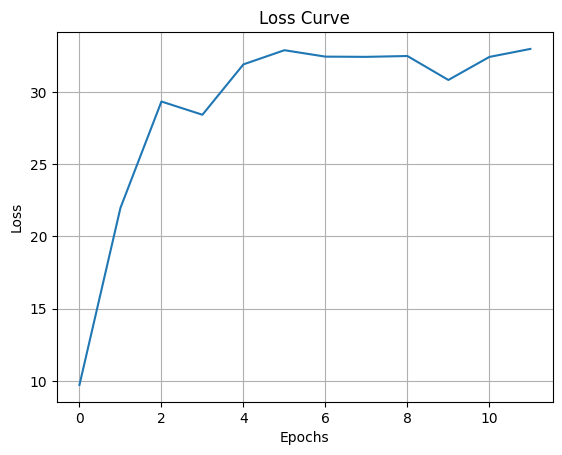

In [22]:
# Plot train_clf 
mlp = train_clf 
mlp.fit(X_train, y_train) 
print("Training set score: %f" % mlp.score(X, y))
print("Training set loss: %f" % mlp.loss_)
# Plot Loss 
plt.plot(mlp.loss_curve_)
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: Con

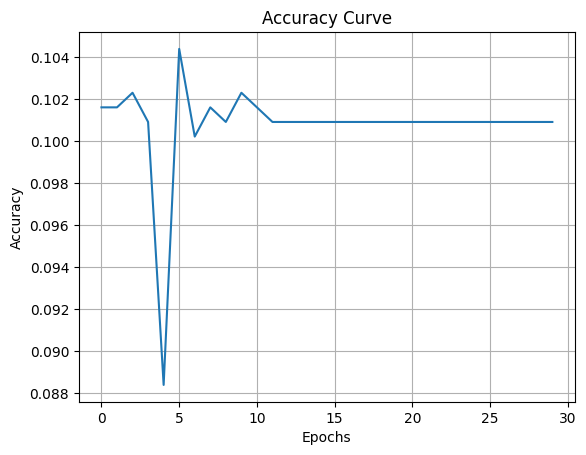

In [31]:
# Plot Accuracy 
epochs_count = range(0, 30)
mlp = train_clf 
mlp.fit(X_train, y_train) 
y_pred = mlp.predict(X_test)
scores = []
for i in range(30): 
  mlp = MLPClassifier(hidden_layer_sizes=(300), activation="logistic", 
                    solver="sgd", learning_rate_init=5, batch_size=1000, max_iter=i+1, early_stopping=False,
                    random_state=22) 
  mlp.fit(X_train, y_train)
  sc = mlp.score(X_train, y_train)
  scores.append(sc) 
plt.plot(epochs_count, scores)
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.show()